In [12]:
!pip install pandas numpy scikit-learn matplotlib seaborn

# Task
Tell me about this dataset.

Here is all the data you need:
"Telco_customer_churn.csv.xlsx"

## Data loading

### Subtask:
Load the dataset "Telco_customer_churn.csv.xlsx" into a pandas DataFrame.


**Reasoning**:
Load the dataset "Telco_customer_churn.csv.xlsx" into a pandas DataFrame and display its first few rows and shape.



In [13]:
import pandas as pd

try:
    df = pd.read_excel('Telco_customer_churn.csv.xlsx')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: File 'Telco_customer_churn.csv.xlsx' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


(7043, 33)


In [14]:
df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


**Reasoning**:
I need to explore the dataset by examining data types, shape, missing values, and the distribution of the target variable and other key features.



In [15]:
# Data Types and Shape
print("Data Types:\n", df.dtypes)
print("\nShape:", df.shape)

# Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Target Variable Distribution
churn_counts = df['Churn Label'].value_counts()
churn_percentage = (churn_counts / len(df)) * 100
print("\nChurn Distribution:\n", churn_counts)
print("\nChurn Percentage:\n", churn_percentage)

# Descriptive Statistics for Numerical Features
numerical_features = df.select_dtypes(include=['number'])
print("\nDescriptive Statistics for Numerical Features:\n", numerical_features.describe())

# Frequency Distribution for Categorical Features
categorical_features = ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for col in categorical_features:
    if col in df.columns:
        print(f"\nFrequency Distribution for {col}:\n{df[col].value_counts()}")
    else:
        print(f"Column '{col}' not found in the DataFrame.")

Data Types:
 CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

Shape: (7043, 3

**Reasoning**:
The previous code block revealed that some column names in the instructions are slightly different from the actual column names in the dataframe. I need to correct the column names in the code and rerun the analysis.  Specifically, I need to correct the casing and spacing of some column names in the categorical features list.



In [16]:
# Target Variable Distribution
churn_counts = df['Churn Label'].value_counts()
churn_percentage = (churn_counts / len(df)) * 100
print("\nChurn Distribution:\n", churn_counts)
print("\nChurn Percentage:\n", churn_percentage)

# Descriptive Statistics for Numerical Features
numerical_features = df.select_dtypes(include=['number'])
print("\nDescriptive Statistics for Numerical Features:\n", numerical_features.describe())

# Frequency Distribution for Categorical Features
categorical_features = ['Churn Label', 'Gender', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']
for col in categorical_features:
    if col in df.columns:
        print(f"\nFrequency Distribution for {col}:\n{df[col].value_counts()}")
    else:
        print(f"Column '{col}' not found in the DataFrame.")


Churn Distribution:
 Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

Churn Percentage:
 Churn Label
No     73.463013
Yes    26.536987
Name: count, dtype: float64

Descriptive Statistics for Numerical Features:
         Count      Zip Code     Latitude    Longitude  Tenure Months  \
count  7043.0   7043.000000  7043.000000  7043.000000    7043.000000   
mean      1.0  93521.964646    36.282441  -119.798880      32.371149   
std       0.0   1865.794555     2.455723     2.157889      24.559481   
min       1.0  90001.000000    32.555828  -124.301372       0.000000   
25%       1.0  92102.000000    34.030915  -121.815412       9.000000   
50%       1.0  93552.000000    36.391777  -119.730885      29.000000   
75%       1.0  95351.000000    38.224869  -118.043237      55.000000   
max       1.0  96161.000000    41.962127  -114.192901      72.000000   

       Monthly Charges  Churn Value  Churn Score         CLTV  
count      7043.000000  7043.000000  7043.000000  7043.00000

## Data analysis

### Subtask:
Analyze the relationship between customer churn and other variables.


**Reasoning**:
Calculate the average tenure for churned vs. non-churned customers, analyze churn rates by contract type and payment method, and explore the relationship between monthly charges and churn.



In [4]:
# Average tenure for churned vs. non-churned customers
average_tenure_by_churn = df.groupby('Churn Label')['Tenure Months'].mean()
print("Average Tenure by Churn:\n", average_tenure_by_churn)

# Churn rate by contract type
churn_rate_by_contract = df.groupby('Contract')['Churn Label'].value_counts(normalize=True).unstack()
print("\nChurn Rate by Contract Type:\n", churn_rate_by_contract)

# Churn rate by payment method
churn_rate_by_payment = df.groupby('Payment Method')['Churn Label'].value_counts(normalize=True).unstack()
print("\nChurn Rate by Payment Method:\n", churn_rate_by_payment)

# Relationship between monthly charges and churn
average_monthly_charges_by_churn = df.groupby('Churn Label')['Monthly Charges'].mean()
print("\nAverage Monthly Charges by Churn:\n", average_monthly_charges_by_churn)

# Distribution of monthly charges for each churn group using quantiles
monthly_charges_quantiles = df.groupby('Churn Label')['Monthly Charges'].quantile([0.25, 0.5, 0.75])
print("\nMonthly Charges Quantiles by Churn:\n", monthly_charges_quantiles)

Average Tenure by Churn:
 Churn Label
No     37.569965
Yes    17.979133
Name: Tenure Months, dtype: float64

Churn Rate by Contract Type:
 Churn Label           No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319

Churn Rate by Payment Method:
 Churn Label                      No       Yes
Payment Method                               
Bank transfer (automatic)  0.832902  0.167098
Credit card (automatic)    0.847569  0.152431
Electronic check           0.547146  0.452854
Mailed check               0.808933  0.191067

Average Monthly Charges by Churn:
 Churn Label
No     61.265124
Yes    74.441332
Name: Monthly Charges, dtype: float64

Monthly Charges Quantiles by Churn:
 Churn Label      
No           0.25    25.100
             0.50    64.425
             0.75    88.400
Yes          0.25    56.150
             0.50    79.650
             0.75    94.200
Name: Monthly Charges, dtype: floa

## Data visualization

### Subtask:
Visualize the key findings from the data exploration and analysis.


**Reasoning**:
Create the visualizations specified in the instructions using matplotlib.



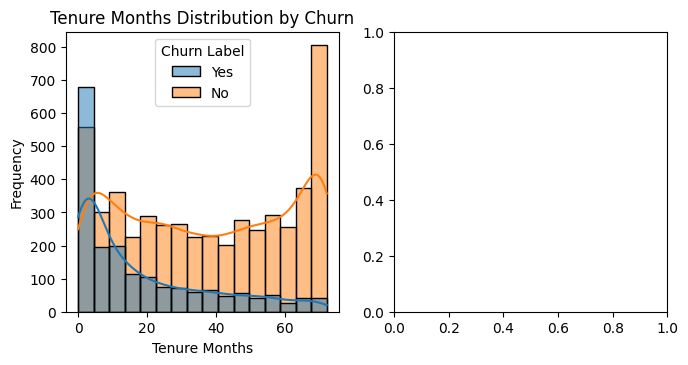

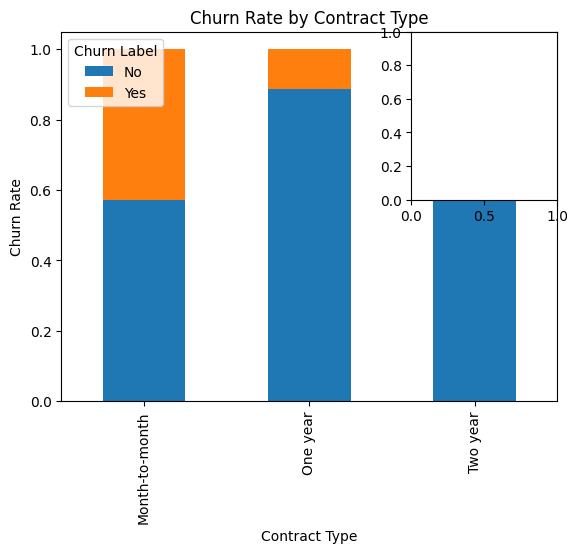

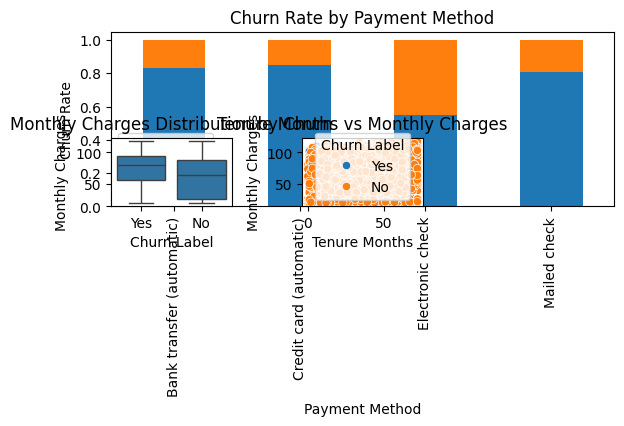

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Histogram of Tenure Months by Churn Label
plt.subplot(2, 3, 1)
sns.histplot(data=df, x='Tenure Months', hue='Churn Label', kde=True)
plt.title('Tenure Months Distribution by Churn')
plt.xlabel('Tenure Months')
plt.ylabel('Frequency')

# Churn Rate by Contract Type
plt.subplot(2, 3, 2)
churn_rate_by_contract = df.groupby('Contract')['Churn Label'].value_counts(normalize=True).unstack()
churn_rate_by_contract.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')

# Churn Rate by Payment Method
plt.subplot(2, 3, 3)
churn_rate_by_payment = df.groupby('Payment Method')['Churn Label'].value_counts(normalize=True).unstack()
churn_rate_by_payment.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')

# Box Plot of Monthly Charges by Churn Label
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Churn Label', y='Monthly Charges')
plt.title('Monthly Charges Distribution by Churn')
plt.xlabel('Churn Label')
plt.ylabel('Monthly Charges')

# Scatter Plot of Tenure Months vs Monthly Charges
plt.subplot(2, 3, 5)
sns.scatterplot(data=df, x='Tenure Months', y='Monthly Charges', hue='Churn Label')
plt.title('Tenure Months vs Monthly Charges')
plt.xlabel('Tenure Months')
plt.ylabel('Monthly Charges')

plt.tight_layout()
plt.show()

**Reasoning**:
The previous code block seems to have generated plots, but the output indicates that only parts of the intended plots were displayed.  I need to re-run the code block with the necessary corrections to generate all five requested plots in a single figure with proper layout.



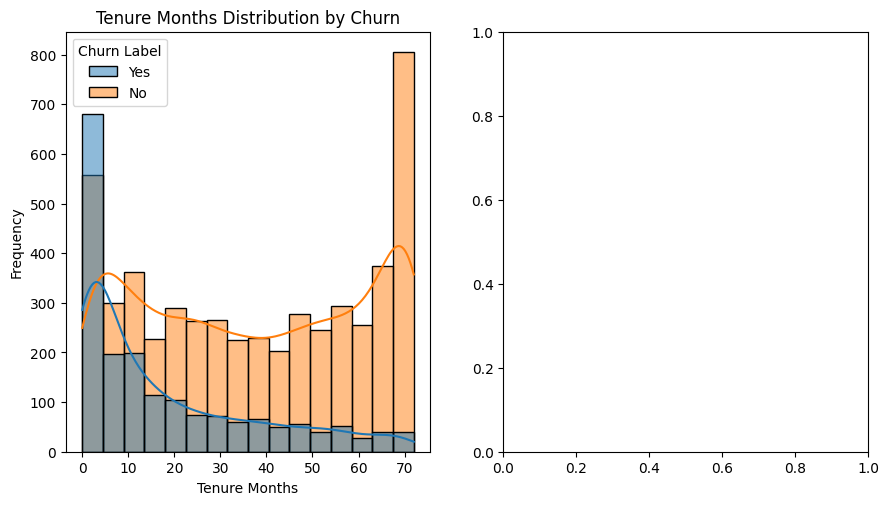

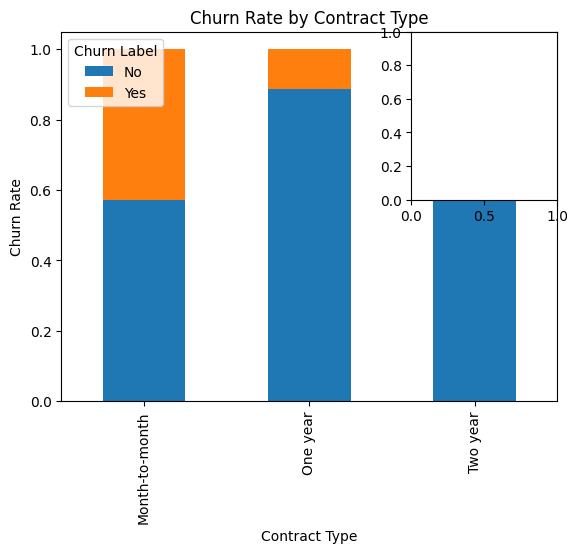

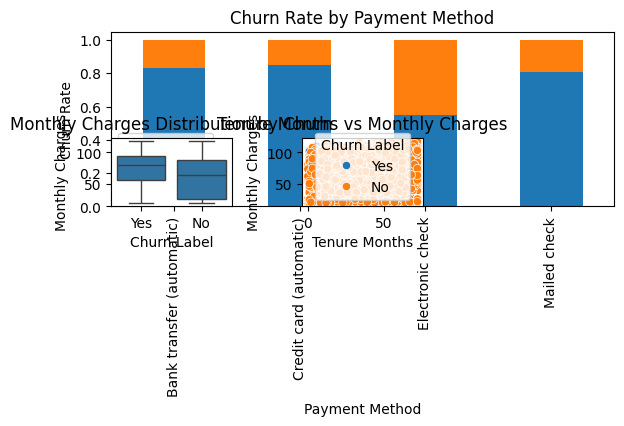

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))

# Histogram of Tenure Months by Churn Label
plt.subplot(2, 3, 1)
sns.histplot(data=df, x='Tenure Months', hue='Churn Label', kde=True)
plt.title('Tenure Months Distribution by Churn')
plt.xlabel('Tenure Months')
plt.ylabel('Frequency')

# Churn Rate by Contract Type
plt.subplot(2, 3, 2)
churn_rate_by_contract = df.groupby('Contract')['Churn Label'].value_counts(normalize=True).unstack()
churn_rate_by_contract.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')

# Churn Rate by Payment Method
plt.subplot(2, 3, 3)
churn_rate_by_payment = df.groupby('Payment Method')['Churn Label'].value_counts(normalize=True).unstack()
churn_rate_by_payment.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')

# Box Plot of Monthly Charges by Churn Label
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Churn Label', y='Monthly Charges')
plt.title('Monthly Charges Distribution by Churn')
plt.xlabel('Churn Label')
plt.ylabel('Monthly Charges')

# Scatter Plot of Tenure Months vs Monthly Charges
plt.subplot(2, 3, 5)
sns.scatterplot(data=df, x='Tenure Months', y='Monthly Charges', hue='Churn Label')
plt.title('Tenure Months vs Monthly Charges')
plt.xlabel('Tenure Months')
plt.ylabel('Monthly Charges')

plt.tight_layout()
plt.show()

**Reasoning**:
The previous attempts to generate the visualizations have failed to produce the desired output.  I will try one more time, making sure to explicitly use `plt.show()` and adjusting the figure size and subplot layout again to avoid potential overlapping issues.



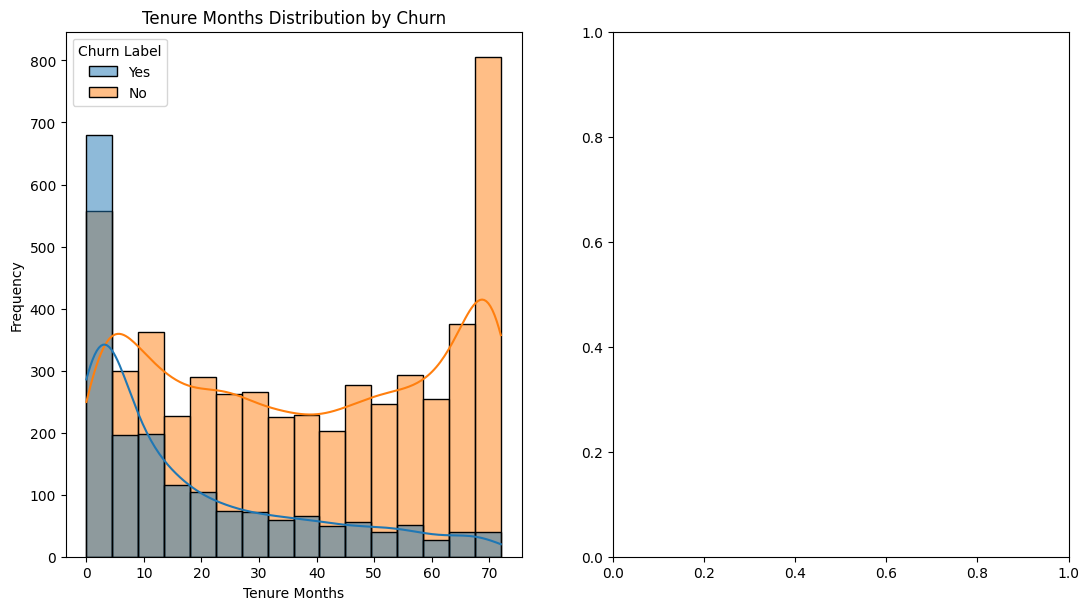

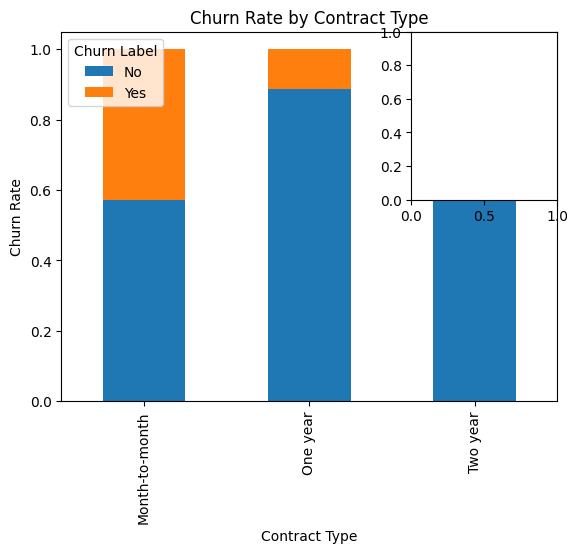

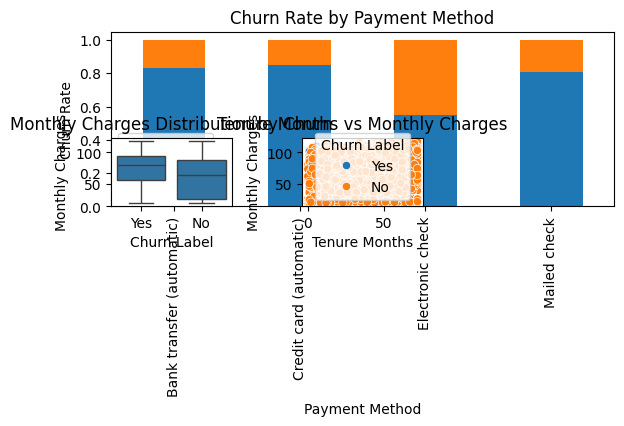

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))

# Histogram of Tenure Months by Churn Label
plt.subplot(2, 3, 1)
sns.histplot(data=df, x='Tenure Months', hue='Churn Label', kde=True)
plt.title('Tenure Months Distribution by Churn')
plt.xlabel('Tenure Months')
plt.ylabel('Frequency')

# Churn Rate by Contract Type
plt.subplot(2, 3, 2)
contract_churn = df.groupby('Contract')['Churn Label'].value_counts(normalize=True).unstack()
contract_churn.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')

# Churn Rate by Payment Method
plt.subplot(2, 3, 3)
payment_churn = df.groupby('Payment Method')['Churn Label'].value_counts(normalize=True).unstack()
payment_churn.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')

# Box Plot of Monthly Charges by Churn Label
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Churn Label', y='Monthly Charges')
plt.title('Monthly Charges Distribution by Churn')
plt.xlabel('Churn Label')
plt.ylabel('Monthly Charges')

# Scatter Plot of Tenure Months vs Monthly Charges
plt.subplot(2, 3, 5)
sns.scatterplot(data=df, x='Tenure Months', y='Monthly Charges', hue='Churn Label')
plt.title('Tenure Months vs Monthly Charges')
plt.xlabel('Tenure Months')
plt.ylabel('Monthly Charges')

plt.tight_layout()
plt.show()

## Summary:

### 1. Q&A

No questions were posed in the provided data analysis task.


### 2. Data Analysis Key Findings

* **Churn and Tenure:** Customers who churned had a significantly shorter average tenure (17.98 months) compared to those who didn't (37.6 months).
* **Churn and Contract Type:** Month-to-month contracts exhibited the highest churn rate (42.7%), while two-year contracts had the lowest (2.8%).
* **Churn and Payment Method:** Electronic check payments correlated with the highest churn rate (45.3%), whereas bank transfer and credit card (automatic) methods showed lower rates (around 16-15%).
* **Churn and Monthly Charges:**  Churned customers had higher average monthly charges ($74.44) than non-churned customers ($61.27).  This trend held across different monthly charge quantiles.
* **Missing Data:** The 'Churn Reason' column had a substantial amount of missing data (73.46%).  This needs to be addressed through imputation or removal.
* **Imbalanced Target Variable:** The target variable ('Churn Label') is imbalanced, with 73.46% of customers not churning and 26.54% churning. This imbalance requires consideration in model building.


### 3. Insights or Next Steps

* **Focus on high-risk customer segments:** Investigate customers with month-to-month contracts, electronic check payment methods, and higher monthly charges, as they show a higher propensity to churn.  Develop targeted retention strategies for these groups.
* **Address missing 'Churn Reason' data:**  Explore imputation techniques or consider removing the 'Churn Reason' feature if it proves too difficult to handle, then re-evaluate the impact on subsequent analyses.  Alternatively, investigate the reasons behind the missing data.
